#Fisher Linear Discriminant
#Difference Matrix
#Auto Encoders

In [2]:
from BcomMEG import *
import matplotlib.pyplot as plt

In [ ]:
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
dir1 = '/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/Data_Sample'
subjects = ['BCOM_18_2', 'BCOM_18_3', 'BCOM_18_4']
picks = None

data = BcomMEG(dir=dir1, subjects=subjects, picks=picks, avoid_reading=False)

In [3]:
trial_1 = data.get_trial(['BCOM_18_2'])

In [11]:
trial_1_averages = {syllable: np.array([]) for syllable in trial_1.data['BCOM_18_2']}
bcom18_2 = trial_1.data['BCOM_18_2']
for syllable in bcom18_2:
    trial_1_averages[syllable] = np.mean(trial_1.data['BCOM_18_2'][syllable], axis=0)

In [65]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

flattened = np.array([trial_1_averages[syllable].ravel() for syllable in trial_1_averages.keys()])
correlation_distance = squareform(pdist(flattened, metric='euclidean'))
    



In [ ]:
print("Correlation Distance Matrix:")
print(correlation_distance)

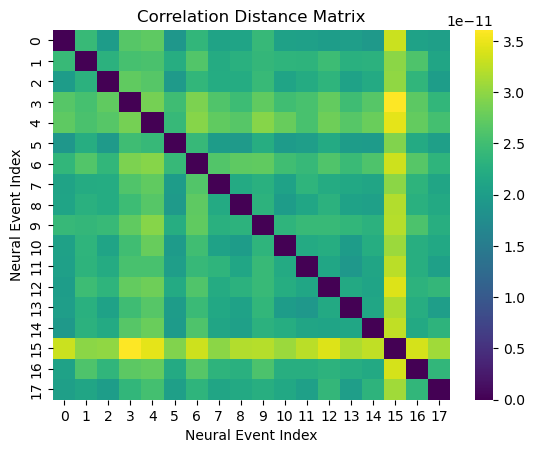

In [67]:
sns.heatmap(correlation_distance, annot=False, cmap='viridis')
plt.title("Correlation Distance Matrix")
plt.xlabel("Neural Event Index")
plt.ylabel("Neural Event Index")
plt.show()

In [71]:
list(trial_1_averages.keys())[15]

'se_54'

In [77]:
trial_1_averages_array = np.array([trial_1_averages[syllable] for syllable in trial_1_averages.keys()])
frobenius_distance = np.zeros((18, 18))

for i in range(18):
    for j in range(18):
        frobenius_distance[i, j] = np.linalg.norm(trial_1_averages_array[i] - trial_1_averages_array[j], ord='fro')

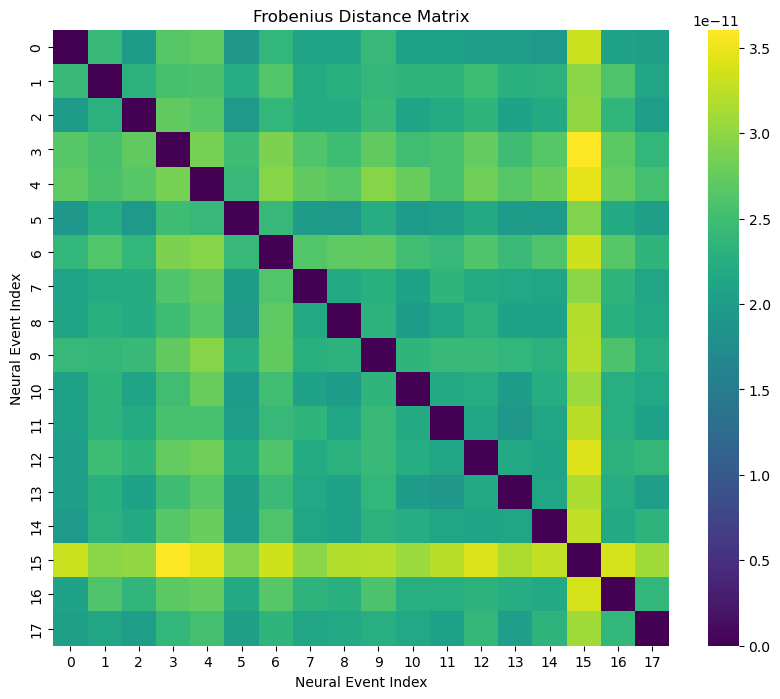

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(frobenius_distance, annot=False, cmap='viridis', square=True, cbar=True)
plt.title("Frobenius Distance Matrix")
plt.xlabel("Neural Event Index")
plt.ylabel("Neural Event Index")
plt.show()
 